In [4]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
import os 

In [5]:
images=sorted(os.listdir("./errors/"))

contrast=0.2
brightness=1. #equalize brightness and contrast

images=images[1:]
for i in images:
    img=cv2.imread("./errors/"+i)
    out=cv2.addWeighted(img,contrast,img,0,brightness)

    
    cv2.imwrite("./enhanced_errors/"+i,out)

In [6]:
from skimage import measure

In [7]:
def create_mask(image):
    gray = cv2.cvtColor( image, cv2.COLOR_BGR2GRAY )
    blurred = cv2.GaussianBlur( gray, (9,9), 0 )
    _,thresh_img = cv2.threshold( blurred, 175, 255, cv2.THRESH_BINARY)
    thresh_img = cv2.erode( thresh_img, None, iterations=2 )
    thresh_img  = cv2.dilate( thresh_img, None, iterations=4 )
    # perform a connected component analysis on the thresholded image,
    # then initialize a mask to store only the "large" components
    
    labels = measure.label( thresh_img,connectivity=1, background=0 )
    mask = np.zeros( thresh_img.shape, dtype="uint8" )
    # loop over the unique components
    for label in np.unique( labels ):
        # if this is the background label, ignore it
        if label == 0:
            continue
        # otherwise, construct the label mask and count the
        # number of pixels
        labelMask = np.zeros( thresh_img.shape, dtype="uint8" )
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero( labelMask )
        # if the number of pixels in the component is sufficiently
        # large, then add it to our mask of "large blobs"
        if numPixels > 300:
            mask = cv2.add( mask, labelMask )
    return mask

In [9]:
images=sorted(os.listdir("./errors/"))

images=images[1:]
for i in images:
    img=cv2.imread("./errors/"+i)
    mask=create_mask(img)

    dst=cv2.inpaint(img,mask,inpaintRadius=3,flags=cv2.INPAINT_TELEA)
    cv2.imwrite("./glare_removed/"+i,dst)    

In [139]:
img=cv2.imread("errors/1c026928987672f57e89faabff8d230e3ec905c63c3fd90b2dae5d5007b7aeca.png")

In [140]:
mask=create_mask(img)

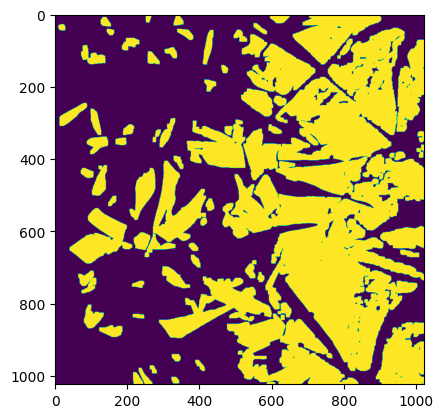

In [141]:
plt.imshow(mask)

In [142]:
dst=cv2.inpaint(img,mask,inpaintRadius=0.001,flags=1)

In [143]:
cv2.imwrite("one.png",dst)

True

In [115]:
grayscale_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred=cv2.GaussianBlur(grayscale_img,(5,5),0)
adjusted=cv2.addWeighted(blurred,10,blurred,0,20)
